#### Team List:

Effy Fang,  Ying Huang, Kai Li, Ziwei Zhao, Jenny Wang, 

# Project Background
### Abstract: Using the wine quality data to demostrate the application of some common data mining and machine learning tools.

## ● Part 1. Dataset

This project uses the two datasets (winequality-red.csv, winequality-white.csv) that are related to red and white variants of the Portuguese "Vinho Verde" wine. These data sets contain 1599 instances for red wine and 4898 instances for white wine with 11 physicochemical features, 1 quality attribute, and 1 reserved attribute that may be manually added later:<br>

○ Features:<br>
■ 1 - fixed acidity<br>
■ 2 - volatile acidity<br>
■ 3 - citric acid<br>
■ 4 - residual sugar<br>
■ 5 - chlorides<br>
■ 6 - free sulfur dioxide<br>
■ 7 - total sulfur dioxide<br>
■ 8 - density<br>
■ 9 - pH<br>
■ 10 - sulphates<br>
■ 11 - alcohol<br>

Output variable (based on sensory data):<br>
■ 12 - quality (score between 0 and 10)<br>

Randomed matched review attribute for modeling purpose:<br>
■ 13- review<br>

## ● Part 2. Objectives
○ Predict Wine Quality<br>
Leverage 11 features of physicochemical data to build different prediction model and predict the wine quality<br>

○ Classify Red and White wine<br>
There are 6 quality classes of red wine and 7 quality classes of white wine.<br>
If we can not see the bottle, purely based on features, can we tell white wine and red wine apart?<br>

○ How to make the wine better? For example, for wineries.<br>
Find the dominating features in the quality determination process. Wineries should focus on these features when making improvements.<br>

○ What to recommend to customers based on their purchase history? - Fore example, for retailers. <br>
Explore different methods to cluster the data using the 11 features. Build a recommendation system based on the clustering results.<br>

Future Work:<br>
■ Incorporate the review texts from tasters in the prediction model.<br>
■ Food and Wine Pairing Recommendation <br>
■ Based on the category of the food, give the recommendation of wine pairing based on the features of the wine, e.g. density and acidity.<br>

### Import Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load  Data & Features Details

In [5]:
red = pd.read_csv("winequality-red.csv", sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


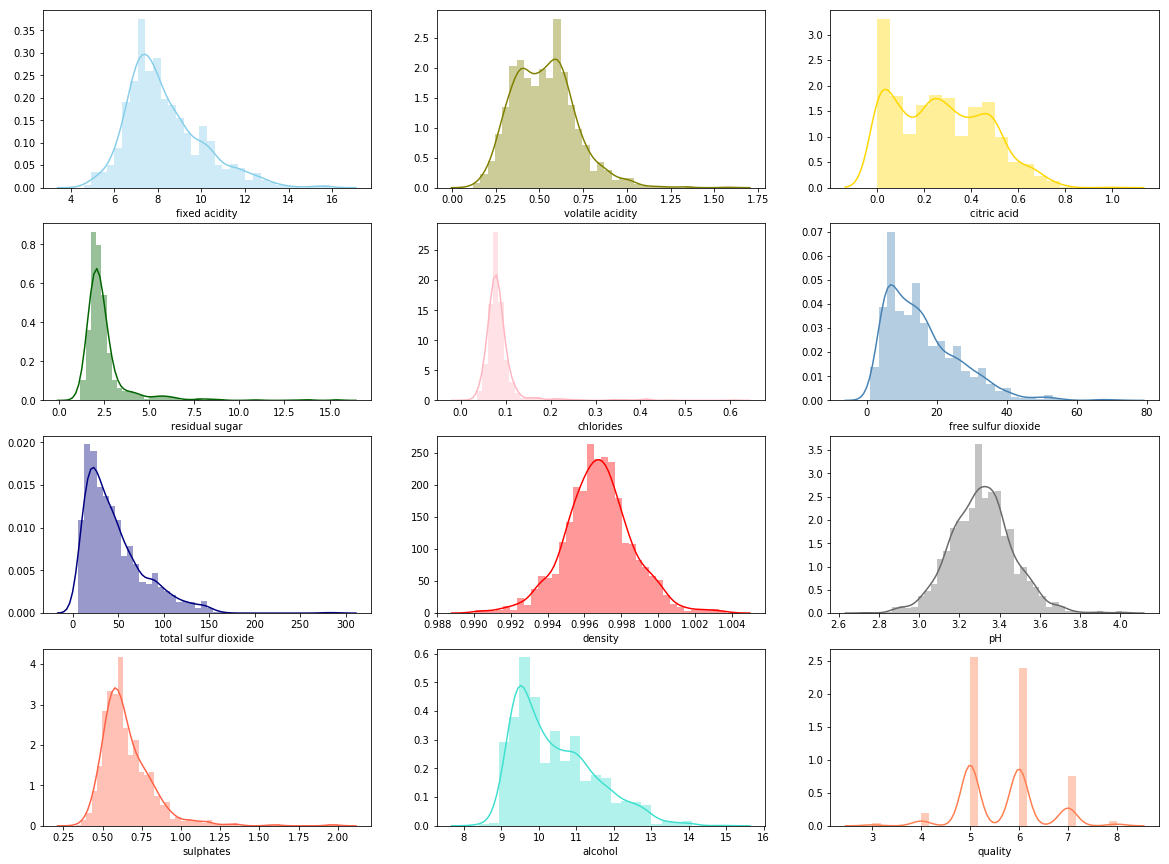

In [7]:
f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.distplot( red["fixed acidity"] , color="skyblue",  ax=axes[0, 0])
sns.distplot( red["volatile acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( red["citric acid"] , color="gold", ax=axes[0, 2])
sns.distplot( red["residual sugar"] , color="darkgreen", ax=axes[1, 0])
sns.distplot( red["chlorides"] , color="lightpink", ax=axes[1, 1])
sns.distplot( red["free sulfur dioxide"] , color="steelblue", ax=axes[1, 2])
sns.distplot( red["total sulfur dioxide"] , color="navy", ax=axes[2, 0])
sns.distplot( red["density"] , color="r", ax=axes[2, 1])
sns.distplot( red["pH"] , color="dimgrey", ax=axes[2, 2])
sns.distplot( red["sulphates"] , color="tomato", ax=axes[3, 0])
sns.distplot( red["alcohol"] , color="turquoise", ax=axes[3, 1])
sns.distplot( red["quality"] , color="coral", ax=axes[3, 2])

In [8]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

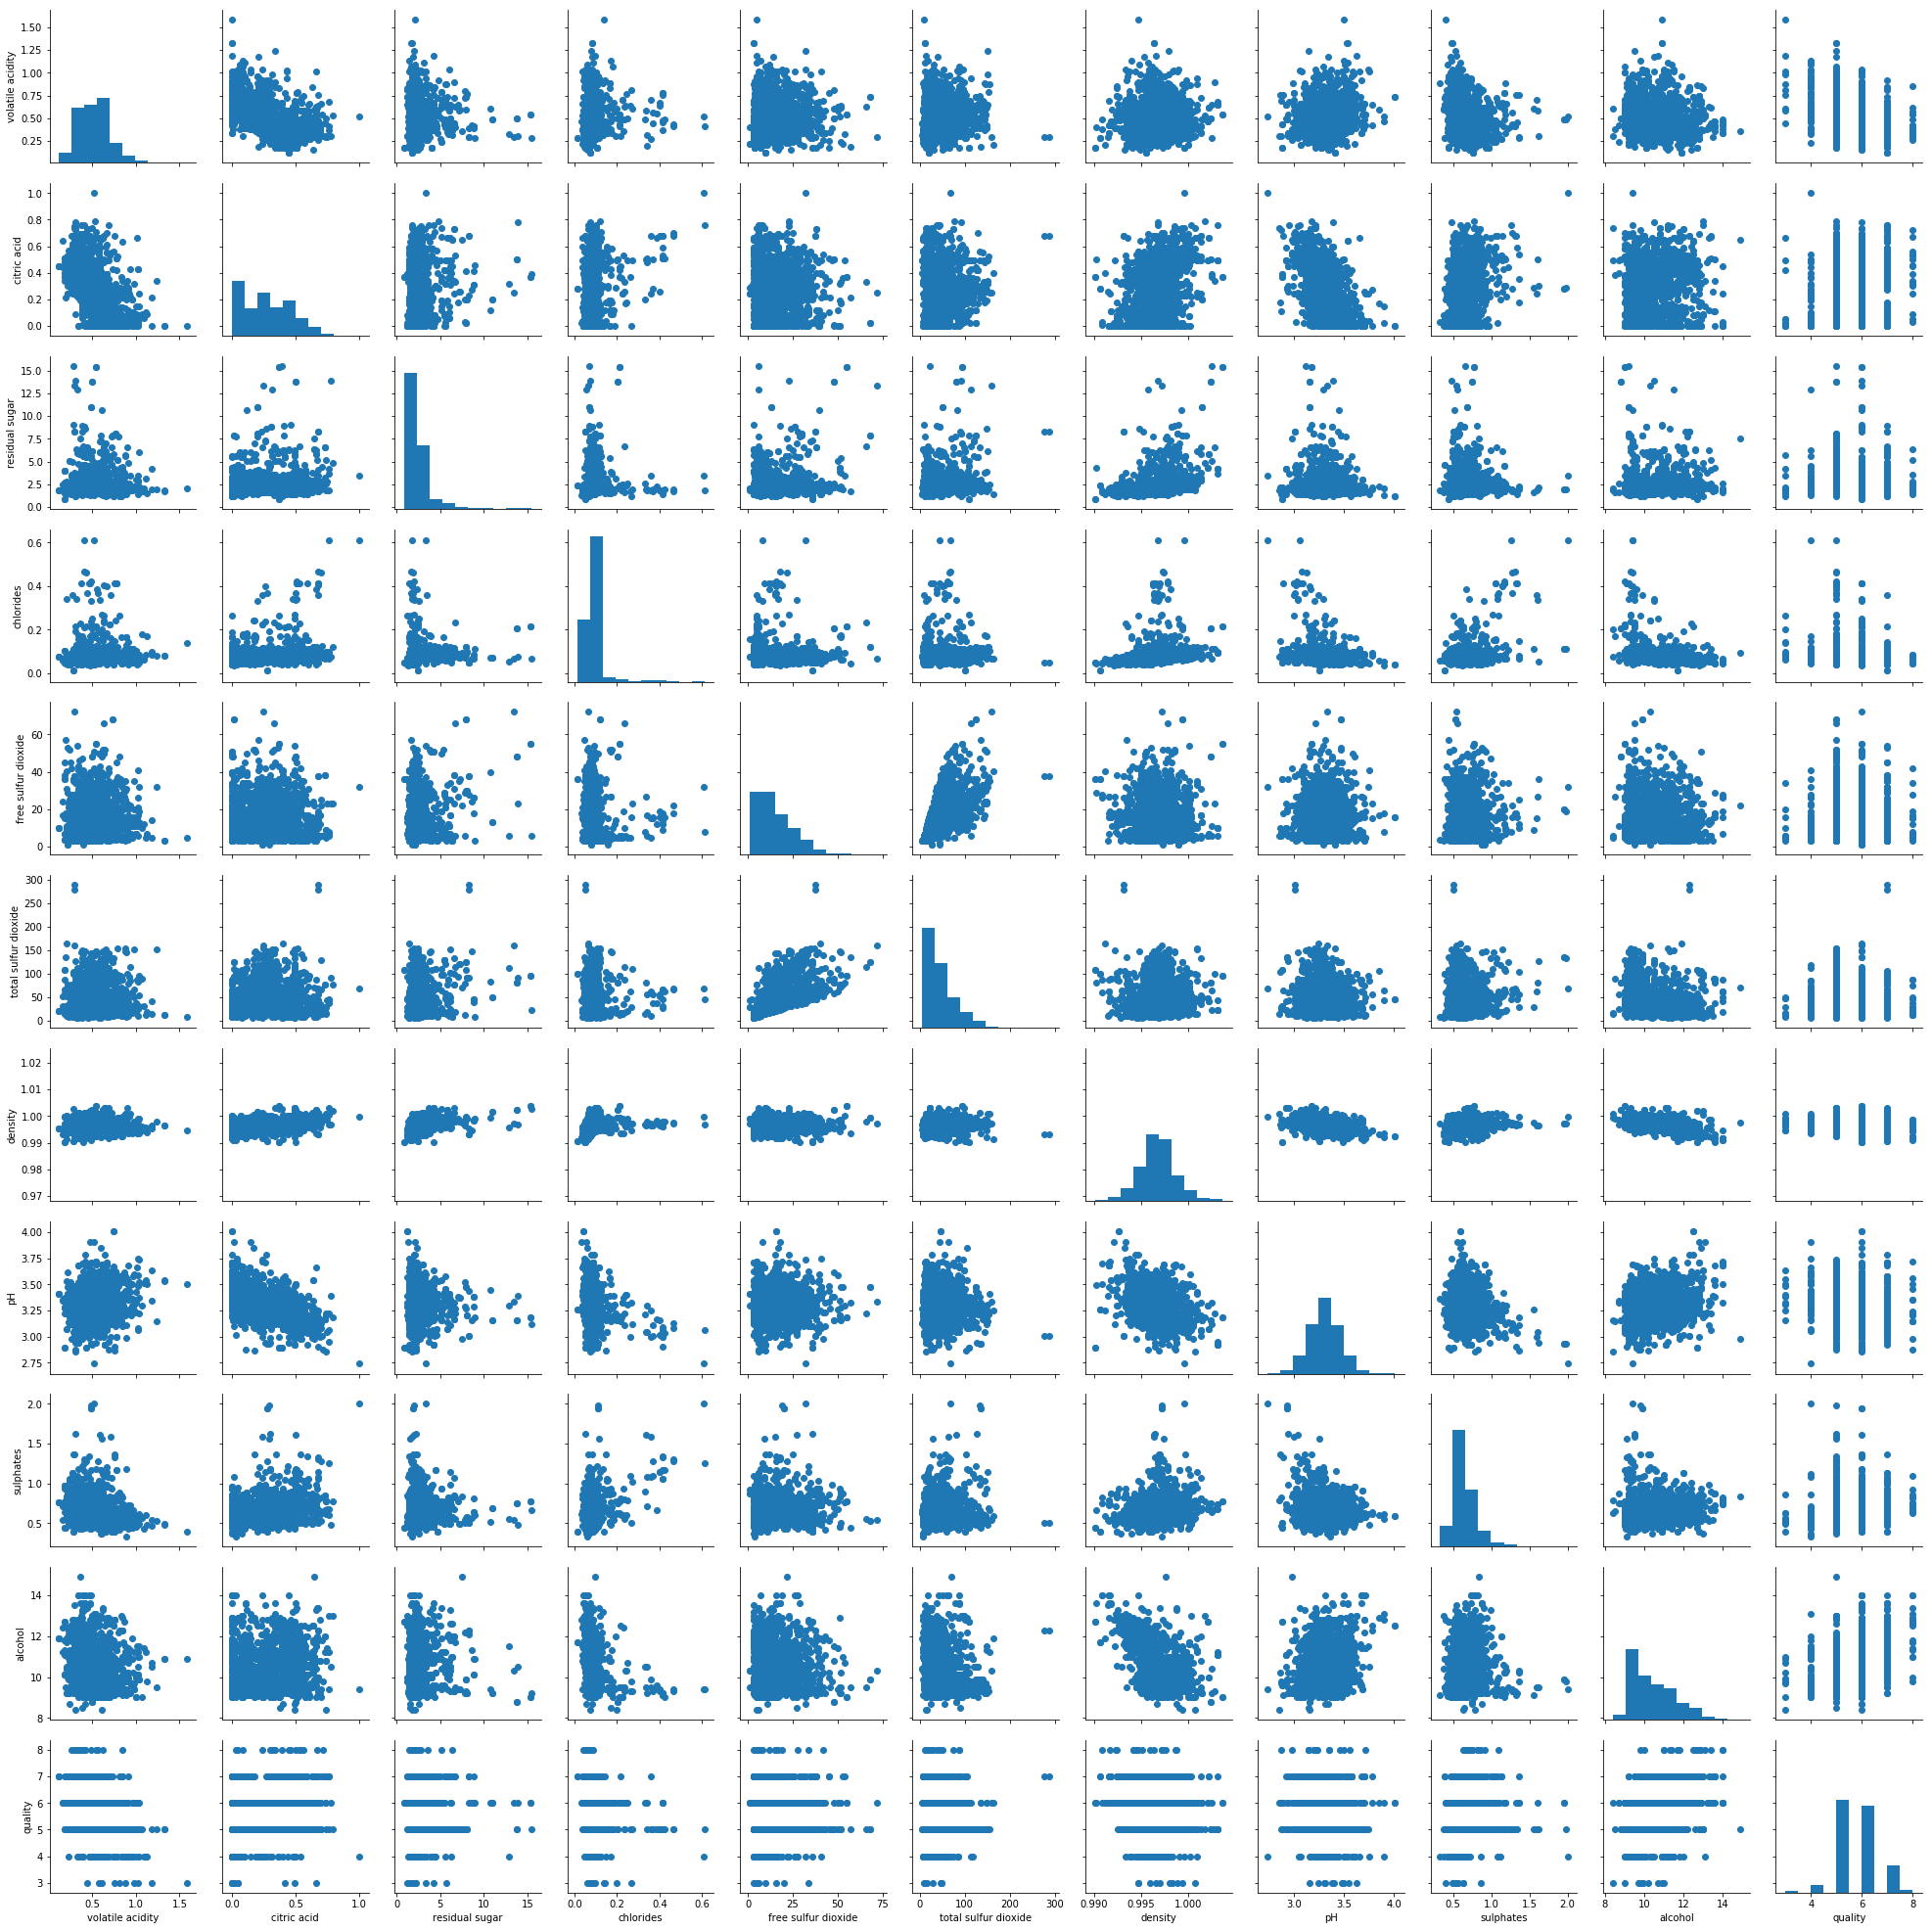

In [9]:
#PairGrid Plot
ax = sns.PairGrid(red, vars = red.iloc[:,1:13])
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
#ax = ax.add_legend()

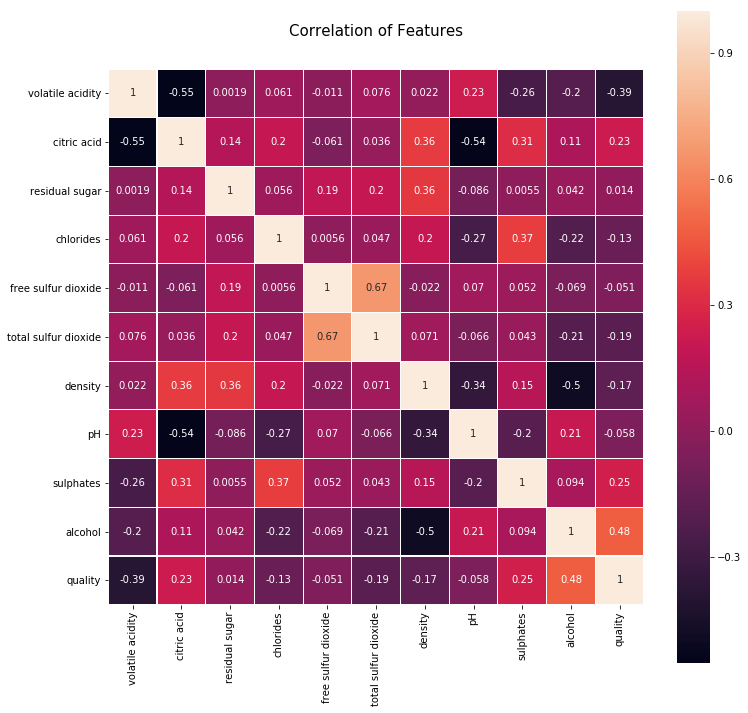

In [10]:
#Heat Map
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(red.iloc[:,1:13].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

For red wine, alcohol affects the quality of the wine the most. The correlation between alcohol and quality for red wine is 0.48. 

The 2nd, 3rd, and 4th important features that affect the alcohol quality the most for red wine are as the following: 

Red: volatile acidity (-0.39), sulphates (0.25), citric acid (0.23).

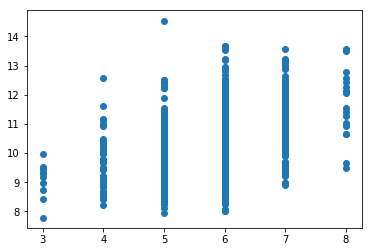

In [11]:
plt.scatter(red["quality"], -red['volatile acidity']+red['alcohol'])

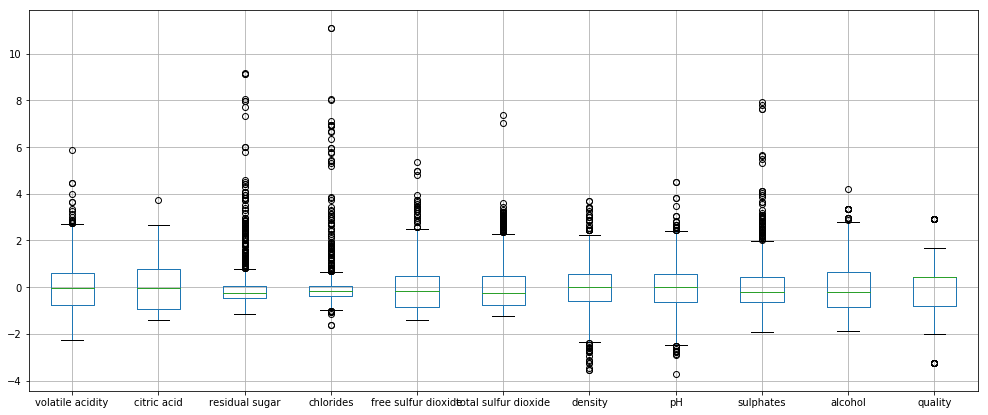

In [12]:
#BoxPlot
plt.figure(figsize=(17, 7))

((red.iloc[:,1:13] - red.iloc[:,1:13].mean()) / red.iloc[:,1:13].std()).boxplot()

## Statistical Method Outlier Detect - Interquartile Ranges & Outliers

In [13]:
# Dectecting outliers which are defined as outside of lower and upper whisker in the box plot
from collections import Counter


# outliers funtion: 
# df is the input data set
# variables are targeted features or column names
# n is number of features with potential outliers in each observation. eg. if n = 1, 
#             then the outliers are the rows with more than 1 features have outter trange values

def outliers(df, variables, n,a):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        
        # Define outliers are outside of 1.5 IQR
        outliers_temp = (df[(df[col] < lower - IQR * a)|(df[col] > upper + IQR * a)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return(multiple_outliers)   

col_list = list(red.columns.values)

# return index list of outliers
Outliers_to_drop = outliers(red, col_list, 2,1.5)
print(Outliers_to_drop)
print(col_list)

[353, 364, 366, 374, 440, 442, 538, 554, 555, 557, 559, 564, 652, 690, 1299, 151, 14, 15, 396, 400, 415, 515, 1114, 1244, 1358, 1434, 1435, 1474, 1476, 1558, 614, 695, 1319, 588, 821, 1269, 1270]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Machine Learning Outlier Detect - DBSCAN


In [11]:
import math
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Treat data set as an unlabeled data set and impliment the DBSCAN to detect outliers
y = red.iloc[:,-1].values
X = red.iloc[:, :-1].values

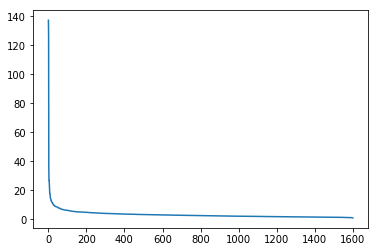

In [12]:

# determine the minimum number of reachable sample
min_sample = round(math.log(len(X)))

nbrs = NearestNeighbors(n_neighbors=min_sample).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,-1], reverse=True)
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)



[0, 150, 0, 30]

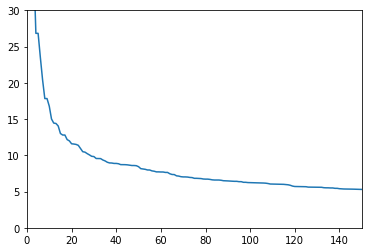

In [13]:
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)
plt.axis([0,150,0,30])

In [14]:
# DBSCAN method

# From the plot, the turnning point is around 10, so set the spslion is 10.
epslion = 10
dbsc = DBSCAN(eps = epslion, min_samples = min_sample).fit(X)
# Get the labels
labels = dbsc.labels_
# Identify the core points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True


In [15]:
# Check if there are two classses. The minor class suppouse to be outliers

unique_labels = np.unique(labels)
print(unique_labels)

# outlier s
outliers = np.where(labels == -1)
outliers = np.array(outliers).tolist()
outliers = outliers[0]

[-1  0]


Text(0, 0.5, 'Y')

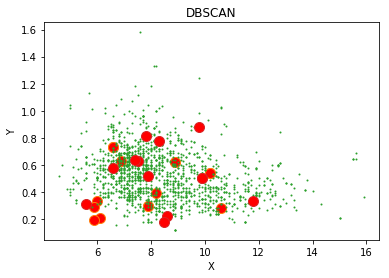

In [16]:
# Generate the plot

for (label) in zip(unique_labels):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = 'green', markersize = 1)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = 'red', markersize = 10)
        
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")

In [17]:
#Intercept of two outlier lists
outlier_list = set(Outliers_to_drop) & set(outliers)
outlier_list 

{14, 15, 396, 400, 1244, 1434, 1435, 1558}

In [18]:
redoutlier = red.copy()
redoutlier['outlier'] = 0
for i in outlier_list:
    redoutlier.iloc[i,12]=1

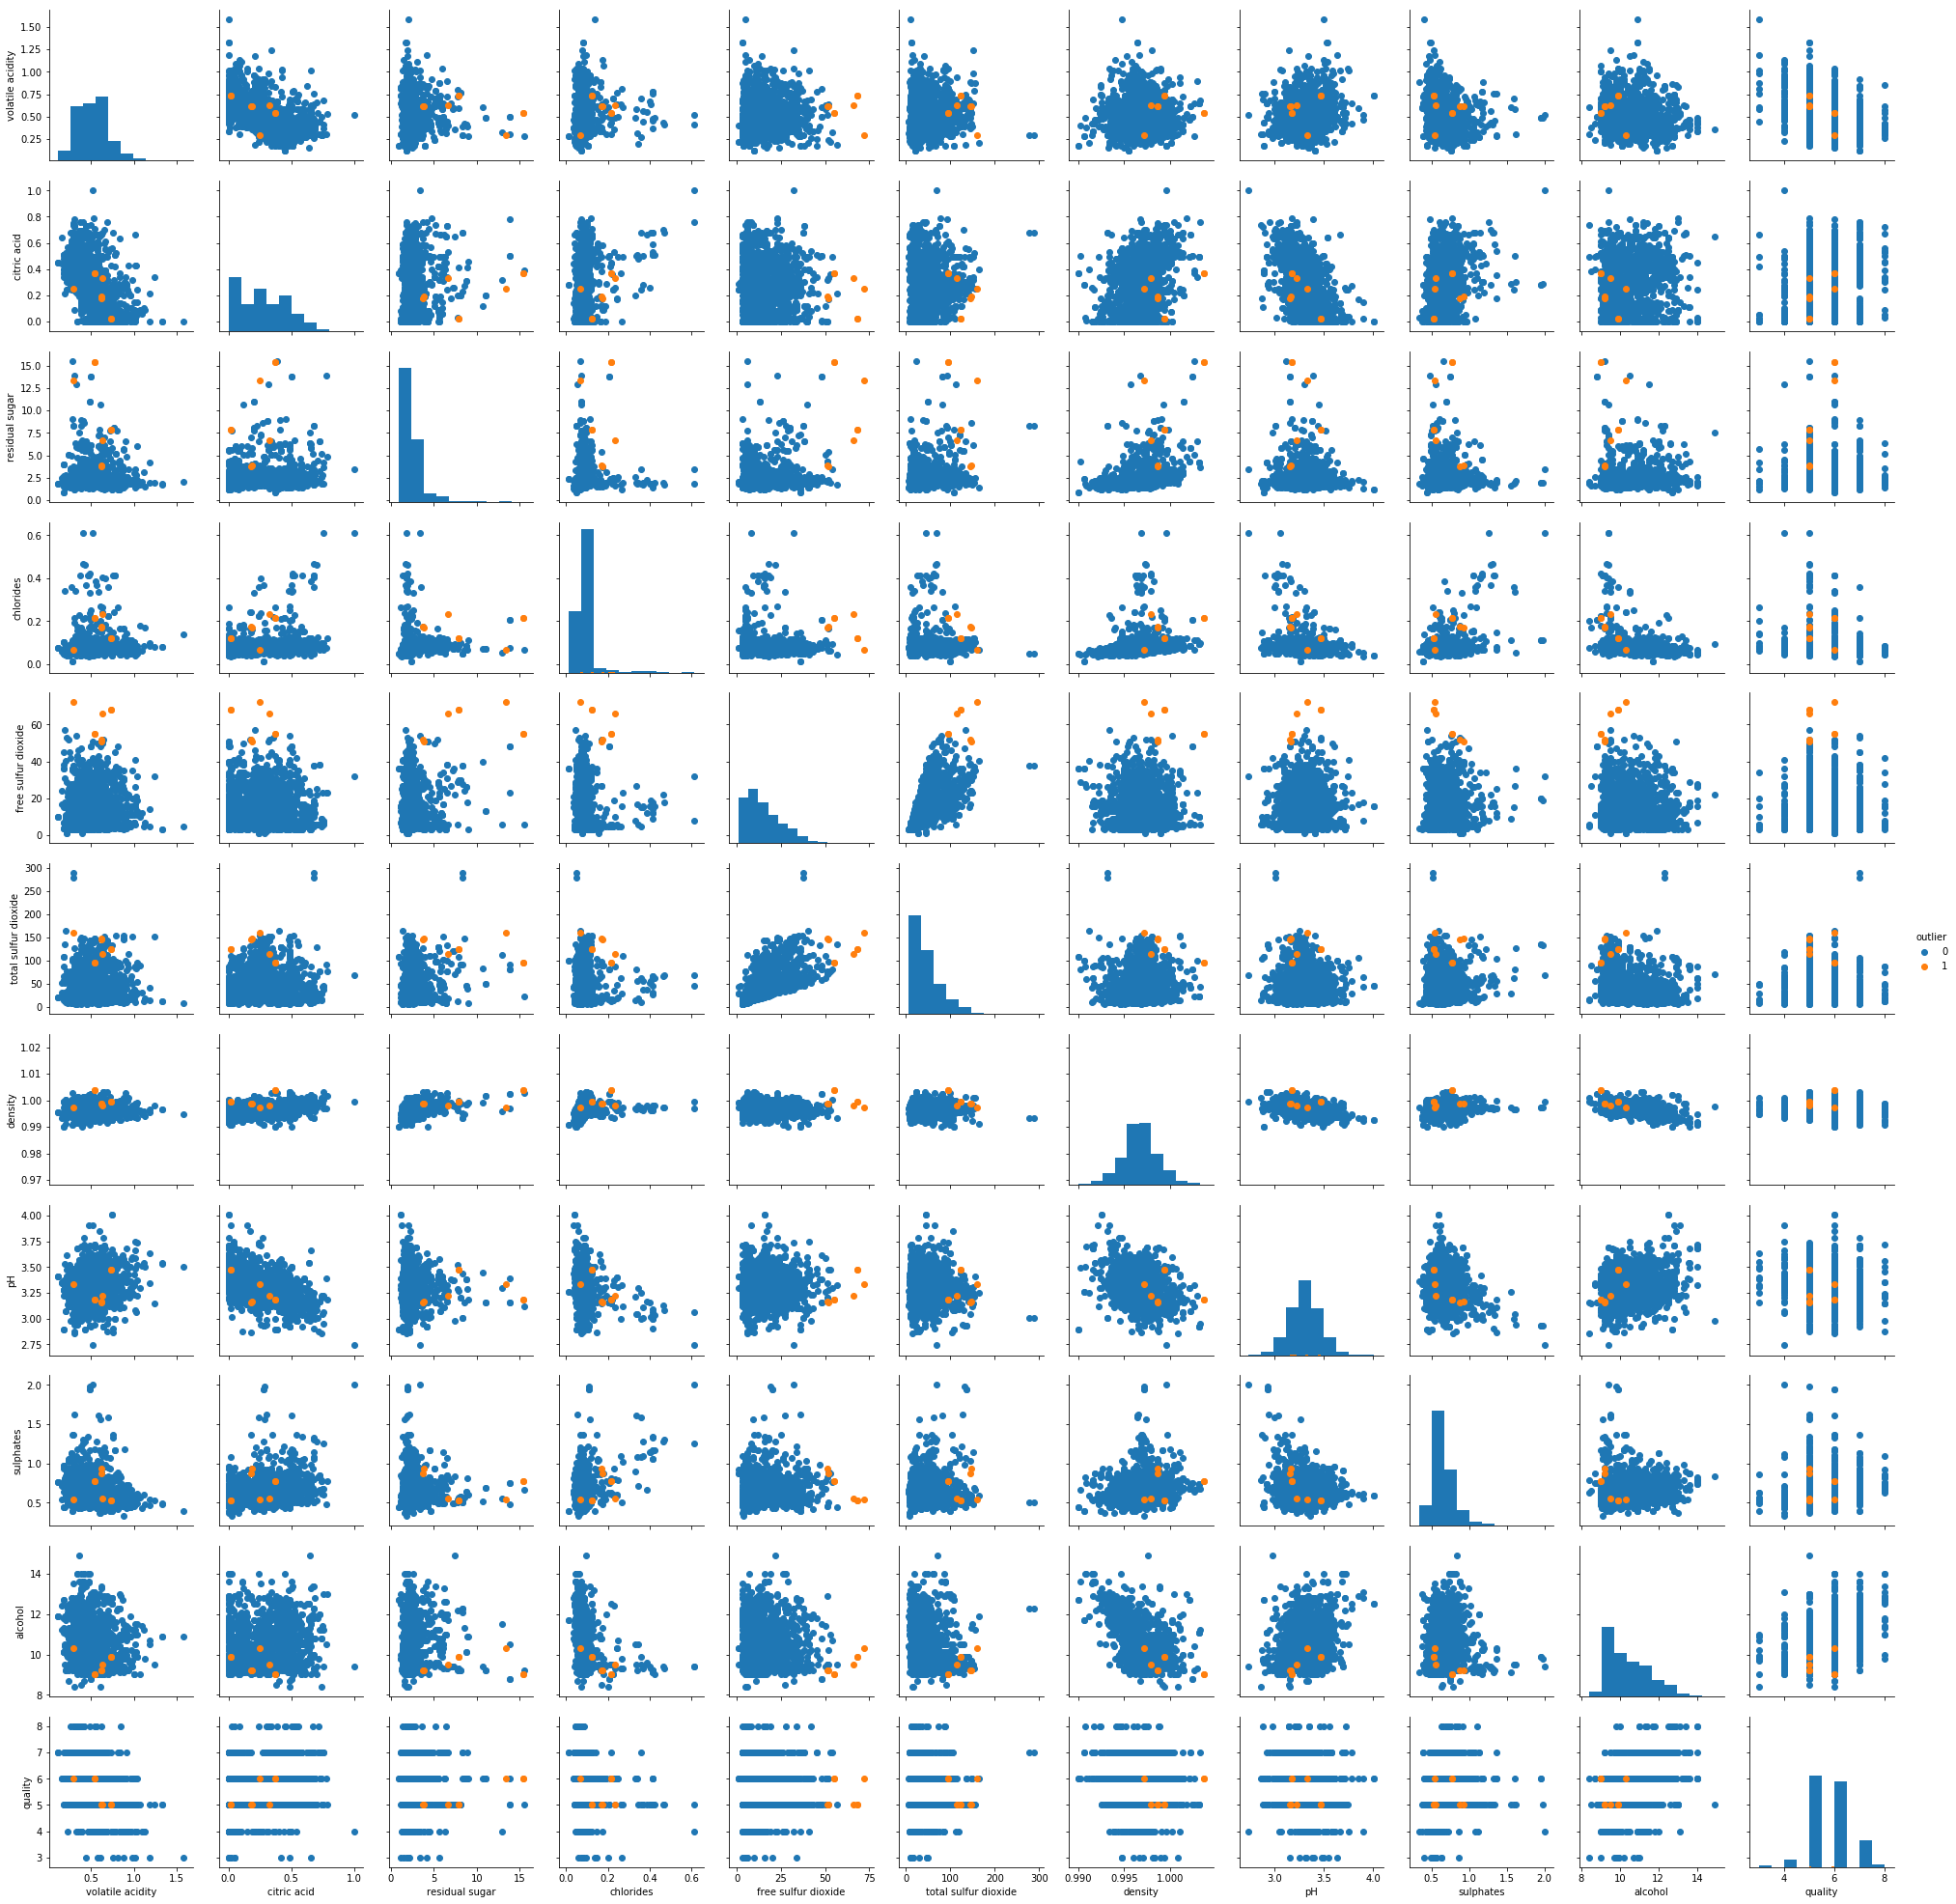

In [19]:
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

In [21]:
# return index list of outliers
def outliers(df, variables, n,a):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        
        # Define outliers are outside of 1.5 IQR
        outliers_temp = (df[(df[col] < lower - IQR * a)|(df[col] > upper + IQR * a)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return(multiple_outliers)   
col_list2 = ['total sulfur dioxide']
Outliers_to_drop = outliers(red, col_list2, 0,3)
print(Outliers_to_drop)

[1079, 1081]


In [22]:
outlier_list  = list(outlier_list)+Outliers_to_drop
print(outlier_list)

[396, 14, 15, 400, 1558, 1434, 1435, 1244, 1079, 1081]


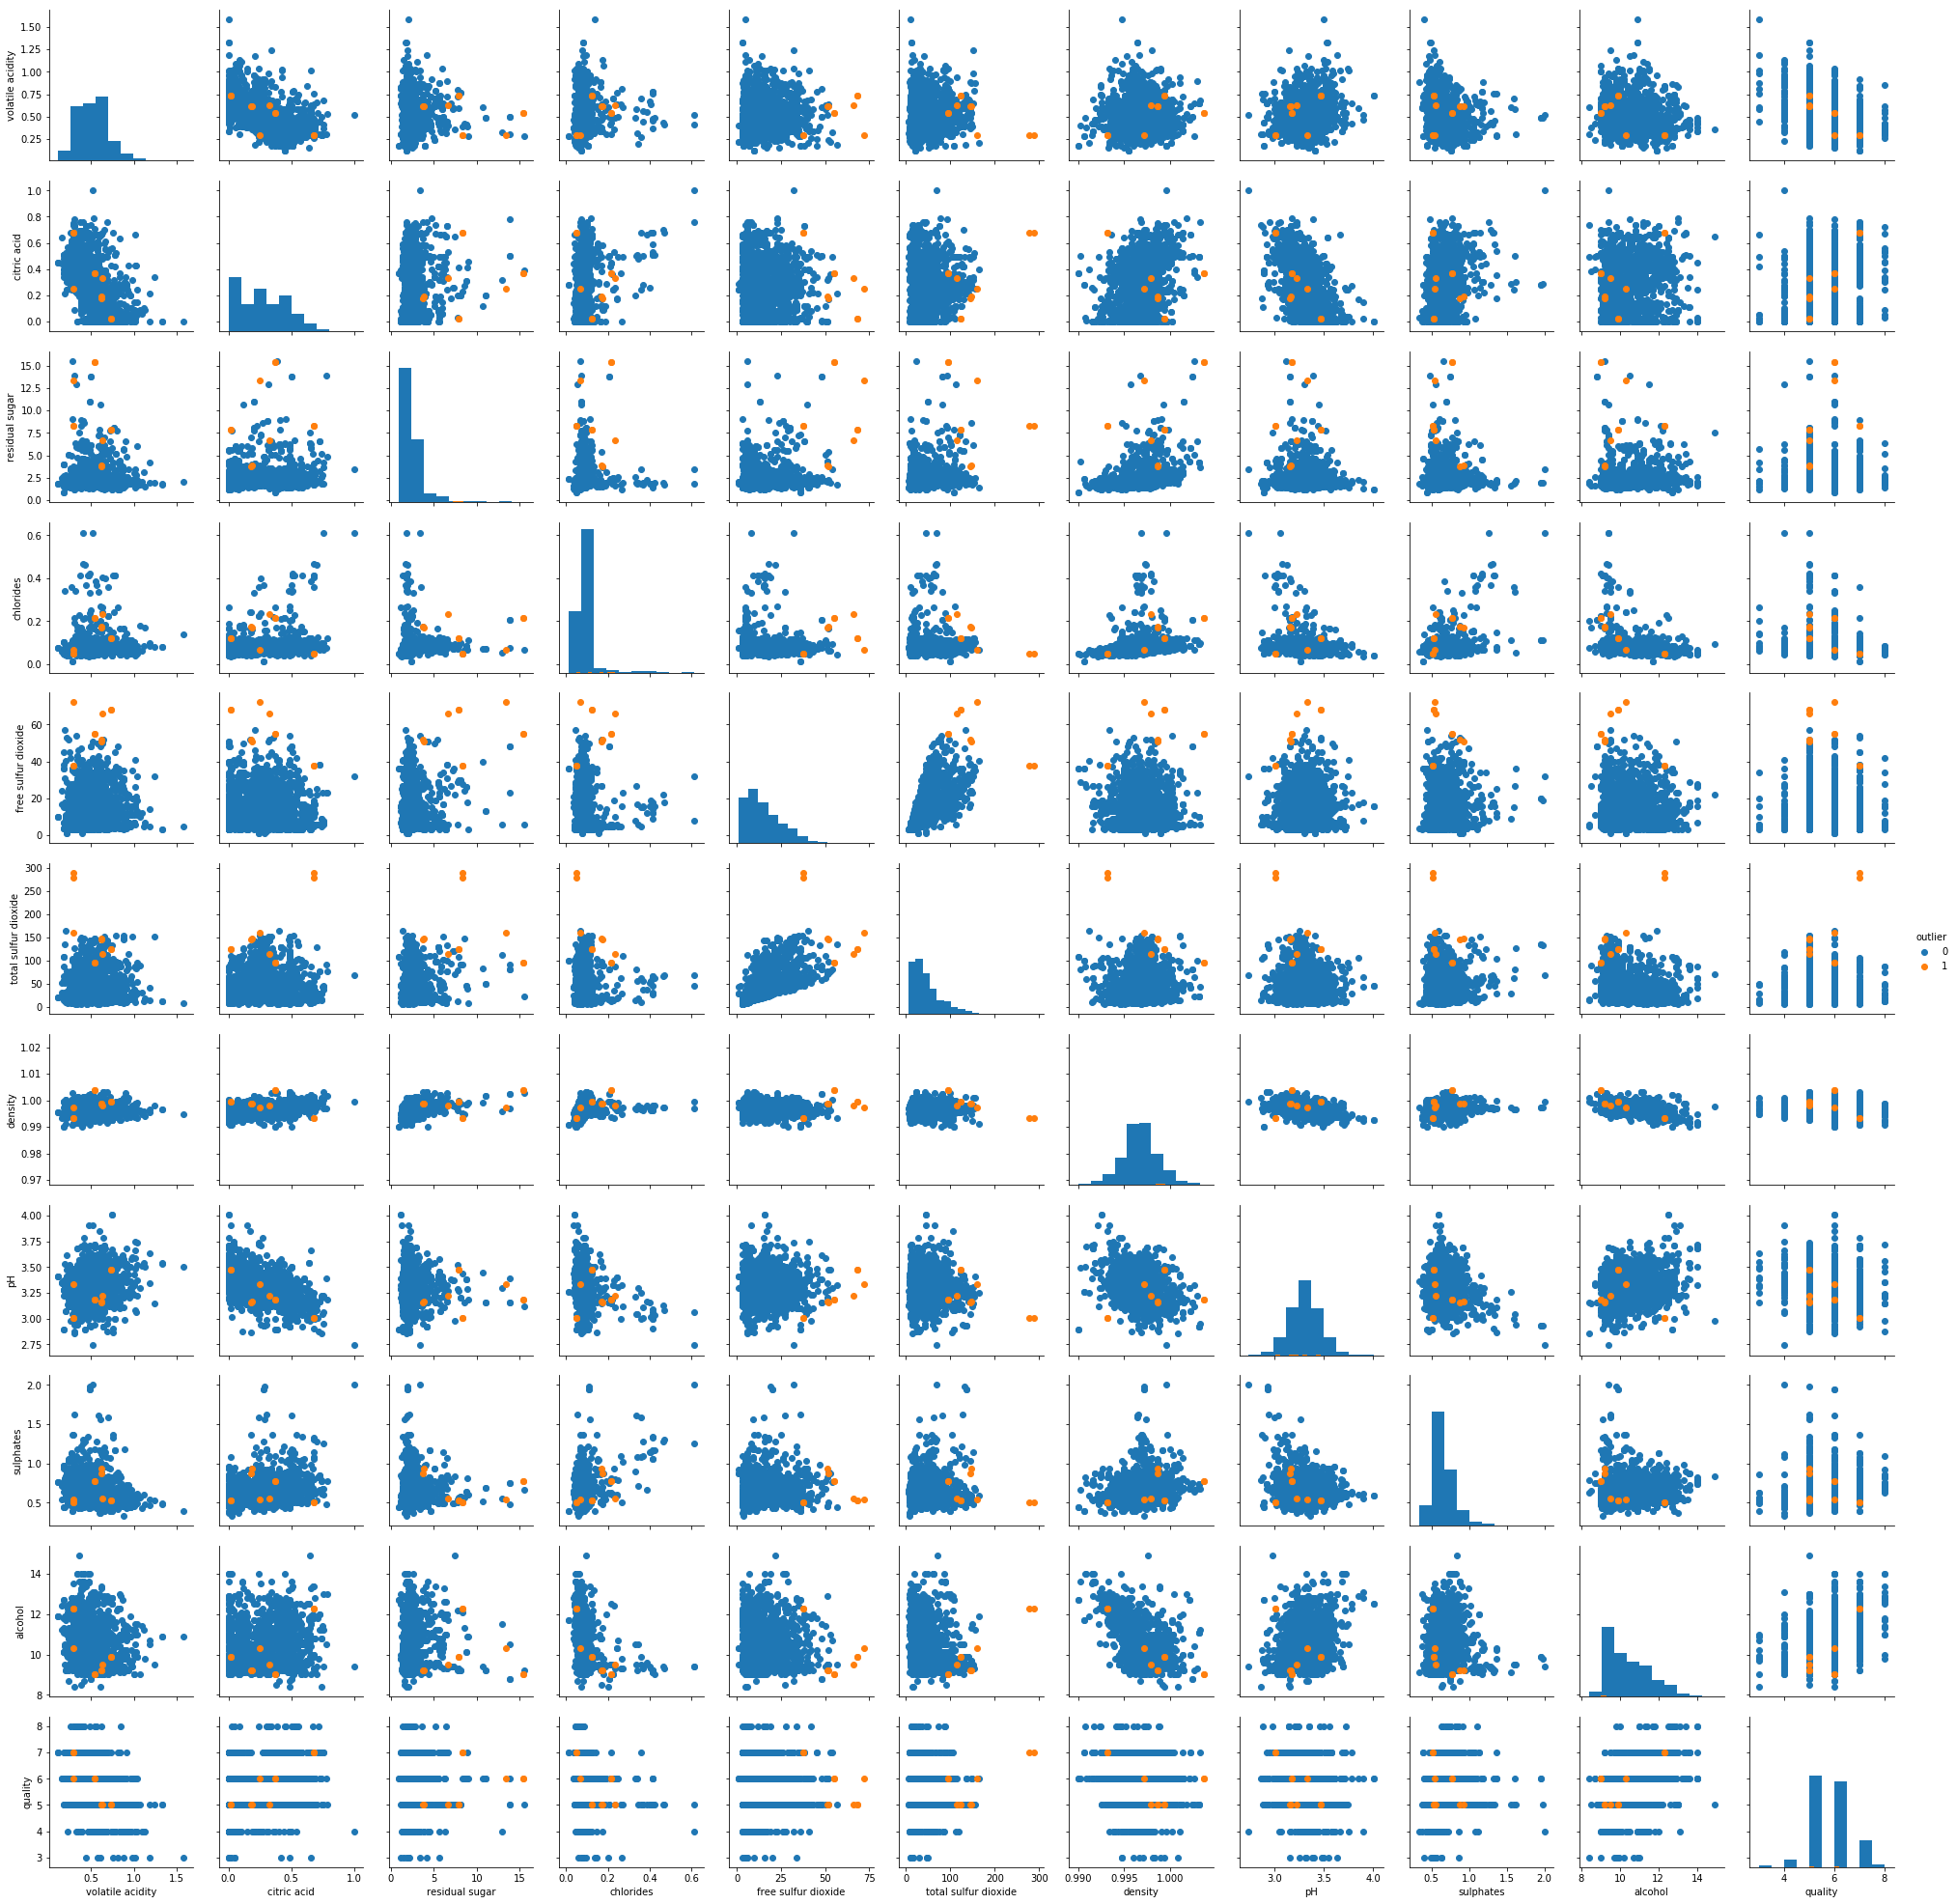

In [23]:
for i in outlier_list:
    redoutlier.iloc[i,12]=1
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

In [24]:
red = red.drop(outlier_list,axis=0)
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.321649,0.527801,0.270736,2.497514,0.087123,15.621145,45.770296,0.996736,3.311687,0.658181,10.425267,5.635620
std,1.742619,0.179142,0.194608,1.274764,0.046716,9.946660,31.359425,0.001869,0.154224,0.169579,1.064440,0.807718
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,57.000000,165.000000,1.003200,4.010000,2.000000,14.900000,8.000000


### Random Match Reviews

In [14]:
review_red = pd.read_csv('winemag-data_first150k.csv')
review_red = review_red.drop(['country','designation','points',\
                             'price','province','region_1','region_2',\
                             'variety','winery'], axis=1)
review_red.rename(columns={'Unnamed: 0':'Number'}, inplace= True)
red_reviews = pd.Series(review_red.description.values, index = review_red.Number).to_dict()
red = red.reset_index(drop=True)
red['review'] = np.random.randint(0,len(review_red),red.shape[0])
red['review'] = red['review'].map(red_reviews)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Though the Leonetti Reserve is a bigger and mo...
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"Blended from Clare Valley, Mount Benson and Ad..."
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,There's bracing heat in this Zin that's blende...
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Subtle smoke shadings color the predominantly ...
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Light in color with aromas of finely scented b...


### Review Word Cloud

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk import corpus
nltk.download("stopwords")
nltk.download('wordnet') 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhihanwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhihanwang/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [16]:
corpus = []
for i in range(0, len(red)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', red['review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

    100% |████████████████████████████████| 163kB 5.7MB/s ta 0:00:01


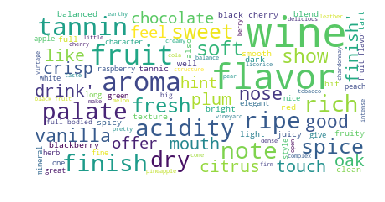

In [18]:
#! pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#### Get Word Features From the Review

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Feature Transformation

tfidf_vectorizer = TfidfVectorizer(max_features= 10, stop_words = 'english',strip_accents = 'unicode')
tfidf = tfidf_vectorizer.fit(red['review'])
# get the top 20 features of the overall review 
features = tfidf.get_feature_names()
print(features)

['acidity', 'aromas', 'black', 'cherry', 'finish', 'flavors', 'fruit', 'palate', 'tannins', 'wine']


In [20]:
#Get features for the wines with quality score 3 
review3 = red[(red['quality']==3)]['review']
tfidf3 = tfidf_vectorizer.fit(review3)
features3 = tfidf3.get_feature_names()
print(features3)

['acidity', 'aromas', 'cherry', 'flavors', 'fruit', 'mouth', 'oak', 'quality', 'tannins', 'wine']


In [21]:
#Get features for the wines with quality score 8
review8 = red[(red['quality']==8)]['review']
tfidf8 = tfidf_vectorizer.fit(review8)
features8 = tfidf8.get_feature_names()
print(features8)

['acidity', 'black', 'cherry', 'dark', 'finish', 'flavors', 'fruit', 'nice', 'red', 'wine']


In [22]:
#Difference of two group features
unique = set(features8).symmetric_difference( set(features3) )
print(unique)

{'tannins', 'black', 'oak', 'red', 'nice', 'dark', 'aromas', 'mouth', 'quality', 'finish'}


In [23]:
#Generate new features form review
red['aromas'] = red['review'].str.contains('aromas').astype(int)
red['spicy'] = red['review'].str.contains('spicy').astype(int)
red['sweet'] = red['review'].str.contains('sweet').astype(int)
red['dry'] = red['review'].str.contains('dry').astype(int)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Though the Leonetti Reserve is a bigger and mo...,0,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"Blended from Clare Valley, Mount Benson and Ad...",0,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,There's bracing heat in this Zin that's blende...,0,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Subtle smoke shadings color the predominantly ...,1,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Light in color with aromas of finely scented b...,1,0,1,0


### Truncated SVD

In [24]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(max_features= 20, stop_words = 'english',strip_accents = 'unicode')
tfidf_trans = tfidf_vectorizer.fit_transform(red['review'])

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=10)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit
pipeline.fit(tfidf_trans)

# Calculate the cluster labels: labels
labels = pipeline.predict(tfidf_trans)

df = pd.DataFrame({'label': labels, 'quality': red['quality'],'review':red['review']})
print(df.sort_values('label'))

red['label'] = labels
red.head()

      label  quality                                             review
1598      0        6  Modeled on a white Bordeaux, this is a lovely,...
883       0        5  Sweetly ripe and oaky, with pineapple jam, kiw...
887       0        7  This is gentle, supple Pinot Noir that's ready...
277       0        6  Smoky, cedary and, frankly, a bit dominated by...
906       0        5  This wine from the single quinta Quinta do Ted...
...     ...      ...                                                ...
162       5        6  From the beautiful Menfi area of southern Sici...
874       5        7  This is an elegant Nebbiolo-based wine and arg...
357       5        7  A ripe, jammy Zinfandel that opens with a burs...
676       5        6  Immediate aromas of chalk and peach waft up fr...
220       5        6  Sangiovese, Merlot and Cabernet Sauvignon are ...

[1599 rows x 3 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Though the Leonetti Reserve is a bigger and mo...,0,0,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,"Blended from Clare Valley, Mount Benson and Ad...",0,0,0,0,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,There's bracing heat in this Zin that's blende...,0,0,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Subtle smoke shadings color the predominantly ...,1,0,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Light in color with aromas of finely scented b...,1,0,1,0,5


## Kmeans Clustering

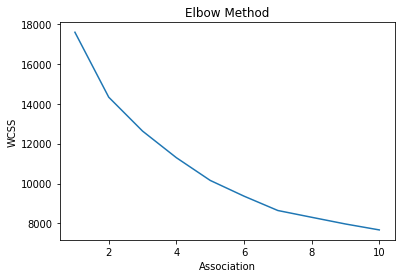

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_standardized=scaler.fit_transform(red.iloc[:,0:11])
y=red['quality']

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [26]:
# elbow point is about 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7   8
labels                          
0        0   9   35  111  26   4
1        0   1   16   12   5   0
2        0   2   29  123  88  10
3        1   4  226   95  10   0
4        0   1   17    9   1   0
5        7  32  277  166  19   0
6        2   4   81  122  50   4


In [27]:
# using 6 clusters instead (same as the number of quality classes showing in the dataset)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7   8
labels                          
0        0   1   18    9   1   0
1        7  36  281  184  23   0
2        0   4   42  161  82  10
3        0   1   28   12   5   0
4        1   7  216   98  11   1
5        2   4   96  174  77   7


In [28]:
red['clusters']=labels
red_grouped = red.groupby('clusters').mean()
print(red_grouped)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
clusters                                                                 
0              8.462069          0.531034     0.493793        1.975862   
1              7.477024          0.651215     0.108644        2.271846   
2              7.144147          0.446923     0.248094        2.182274   
3              7.991304          0.518587     0.348913        8.521739   
4              8.199701          0.535329     0.282096        2.391168   
5             10.680556          0.406958     0.491194        2.646528   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clusters                                                                   
0          0.351172            15.137931             62.068966  0.997097   
1          0.084595            11.481168             32.854991  0.996627   
2          0.068013            16.757525             38.304348  0.994391   
3          0.097174        

the predicted labels does not represent the quality well, but can be used for recommendation. 
for example, cluster 5 hasthe highest fixed acidity, cluster 1 has the lowest citric acid. 

In [29]:
red[red['clusters']==5].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,spicy,sweet,dry,label,clusters
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Subtle smoke shadings color the predominantly ...,1,0,0,0,1,5
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.9969,3.25,0.58,9.5,5,Pascal and Laure Doquet produce Chardonnay-dom...,0,0,0,0,2,5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6,5,"A thin wine, with tight stalkiness and smoky, ...",0,0,0,1,2,5
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5,Opens with friendly pear and banana aromas and...,1,0,1,0,5,5
76,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.9986,3.54,0.66,10.5,5,"Done entirely in stainless steel, this is youn...",0,0,0,0,0,5


In [30]:
red=red.drop(columns=['clusters'])

# TSNE

In [42]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [44]:
#from scatter_2d_label import scatter_2d_label
from sklearn.manifold import TSNE

tSne = TSNE(n_components=2, perplexity=5, random_state=0)
X_tsne1 = tSne.fit_transform(X_standardized)

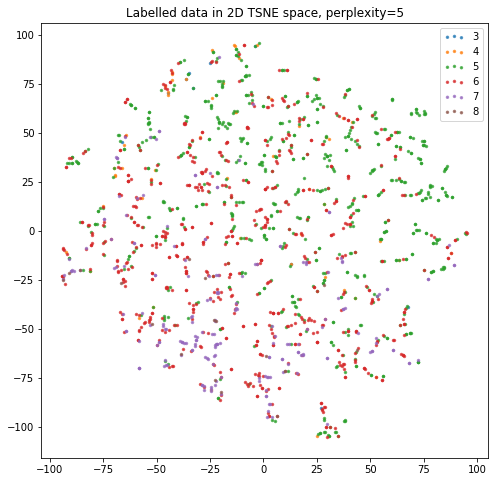

In [45]:
plt.figure(figsize=(8,8))
scatter_2d_label(X_tsne, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=5')
plt.legend(loc='best', scatterpoints=3)
plt.show()

In [47]:
tSne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne2 = tSne.fit_transform(X_standardized)

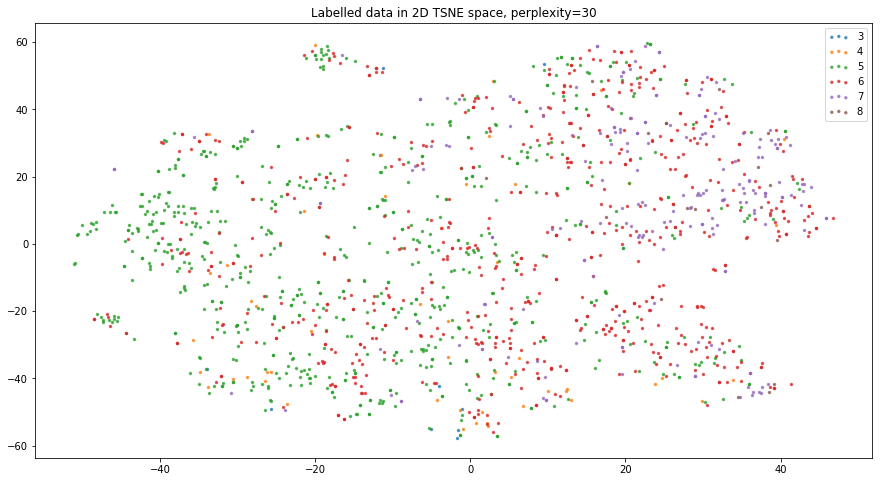

In [49]:
plt.figure(figsize=(15,8))
scatter_2d_label(X_tsne2, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=30')
plt.legend(loc='best', scatterpoints=3)
plt.show()

In [50]:
tSne = TSNE(n_components=3, perplexity=100, random_state=0)
X_tsne3 = tSne.fit_transform(X_standardized)

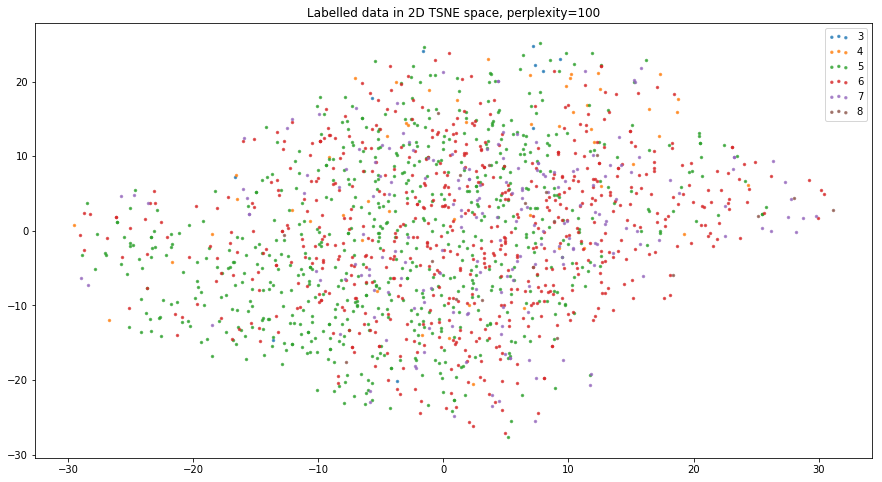

In [51]:
plt.figure(figsize=(15,8))
scatter_2d_label(X_tsne3, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=100')
plt.legend(loc='best', scatterpoints=3)
plt.show()

Treating this as a classification task will be challenging because even after PCA which we attempt next step we find that the classes are quite mixed and they do not form any apparent classes. We are going to continue building our classifier:

### PCA

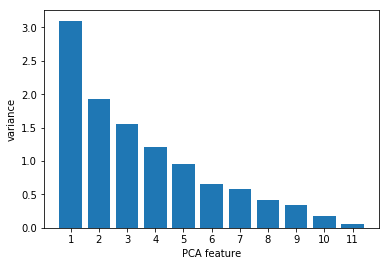

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create scaler: scaler - standard works better here.
scaler = StandardScaler()
#scaler = Normalizer()

# Create PCA instance: model
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(1,pca.n_components_+1)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

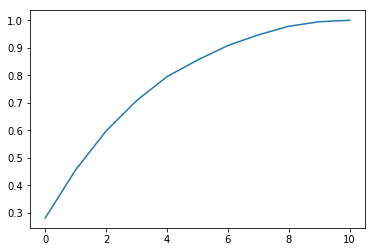

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [45]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9))

(array([ 6,  7,  8,  9, 10]),)


7 features explains more than 90%, 9 expalins more than 95%. 

In [46]:
npc = 7
pca = PCA(n_components=npc, copy=True)
X_transformed = pca.fit_transform(X_standardized)

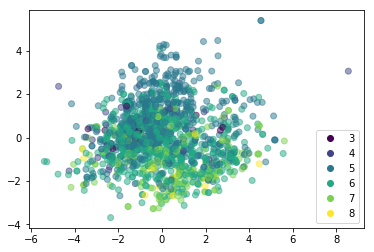

In [47]:
pca_df=pd.DataFrame(X_transformed)

labels = np.unique(y)
scatter = plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=y, label=y,alpha=0.5)

handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

## original data on 6 quality classes

In [48]:
# import the class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#! pip install xgboost
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score

In [49]:
#define models and function.
def run_model(X_train,y_train):
    # logistic regression 
    log_model = LogisticRegression()
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C)
    # LinearSVC (linear kernel)
    lin_svc = svm.LinearSVC(C=C)
    #SVC with RBF kernel
    rbf_svc = svm.SVC(kernel='rbf', C=C)
    # SVC with polynomial (degree 3) kernel
    poly_svc = svm.SVC(kernel='poly', C=C)
    # decision tree
    dt = DecisionTreeClassifier(random_state=0)
    # random forest 
    rf = RandomForestClassifier(random_state=0)
    # naive bayes
    nb = GaussianNB()
    # perceptron 
    per = Perceptron()
    # knn 
    knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
    # bagging classifier
    bc = BaggingClassifier(base_estimator=dt, random_state=0)
    # Import AdaBoostClassifier
    ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
    # xg 
    xg=XGBClassifier()

    models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
    names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
            'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

    acc_mean=[]
    acc_high=[]
    acc_low=[]
    acc_std=[]
    f1_mean=[]
    f1_high=[]
    f1_low=[]
    f1_std=[]


    for model in models:
       # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
        acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
        f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
        acc_mean.append(acc_scores.mean())
        acc_high.append(acc_scores.max())
        acc_low.append(acc_scores.min())
        acc_std.append(acc_scores.std())
        f1_mean.append(f1_scores.mean())
        f1_high.append(f1_scores.max())
        f1_low.append(f1_scores.min())
        f1_std.append(f1_scores.std())

    cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                       'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
    return(cv_df.round(3).sort_values(by='acc_mean', ascending=False))
    

In [50]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['quality'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.639,0.675,0.608,0.027,0.620,0.660,0.590,0.028
12,XG Boosting,0.632,0.664,0.614,0.018,0.616,0.644,0.596,0.016
10,Bagging Classifier,0.630,0.663,0.591,0.026,0.612,0.647,0.575,0.028
3,SVC(RBF),0.609,0.643,0.588,0.021,0.583,0.621,0.563,0.024
4,SVC(polynomial),0.593,0.629,0.570,0.023,0.569,0.603,0.544,0.024
0,Logistic Regression,0.588,0.635,0.554,0.029,0.552,0.603,0.514,0.030
11,Ada Boosting,0.583,0.606,0.560,0.018,0.582,0.607,0.555,0.022
2,Linear SVC,0.581,0.631,0.558,0.027,0.533,0.587,0.510,0.029
5,Decision Tree,0.576,0.605,0.541,0.021,0.574,0.601,0.536,0.022
1,SVC(linear kernal),0.575,0.635,0.534,0.033,0.525,0.578,0.482,0.031


## break it into 3 tiers

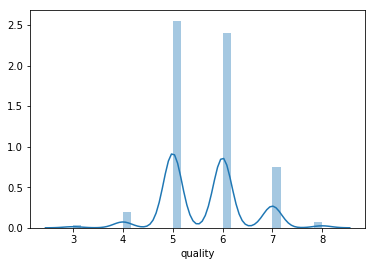

In [51]:
sns.distplot(red['quality'])

the majority of the wines are in quality class 5 and 6. we consider 6 as the middle class by itself, and the ones below 6 to be the lower class, and the ones above to be the upper class. 

In [52]:
# 3 levels
tiers = []
for i in red['quality']:
    if i >= 1 and i <= 5:
        tiers.append('1')
    elif i ==6:
        tiers.append('2')
    elif i >= 7 and i <= 10:
        tiers.append('3')
red['tier'] = tiers

In [53]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['tier'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.681,0.710,0.652,0.020,0.677,0.704,0.650,0.019
12,XG Boosting,0.674,0.715,0.645,0.027,0.669,0.713,0.641,0.029
10,Bagging Classifier,0.666,0.684,0.646,0.016,0.661,0.680,0.641,0.016
11,Ada Boosting,0.644,0.668,0.621,0.017,0.644,0.669,0.621,0.017
3,SVC(RBF),0.640,0.668,0.617,0.021,0.630,0.663,0.604,0.024
5,Decision Tree,0.631,0.643,0.617,0.010,0.632,0.643,0.617,0.010
4,SVC(polynomial),0.622,0.659,0.597,0.021,0.607,0.647,0.577,0.024
0,Logistic Regression,0.617,0.676,0.581,0.032,0.601,0.659,0.560,0.033
1,SVC(linear kernal),0.616,0.672,0.569,0.034,0.604,0.651,0.557,0.031
2,Linear SVC,0.607,0.652,0.569,0.033,0.579,0.622,0.536,0.036


## 2 classes models - good vs bad

In [54]:
# break qualities into 2 levels
red['good?']=(red['quality']>=6)*1

In [55]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['good?'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
10,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
6,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
12,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022
3,SVC(RBF),0.745,0.780,0.713,0.022,0.745,0.779,0.713,0.022
2,Linear SVC,0.744,0.807,0.701,0.035,0.743,0.807,0.701,0.035
0,Logistic Regression,0.741,0.811,0.697,0.038,0.741,0.811,0.697,0.038
1,SVC(linear kernal),0.740,0.815,0.685,0.042,0.741,0.815,0.685,0.042
4,SVC(polynomial),0.733,0.768,0.705,0.021,0.733,0.767,0.705,0.021
7,Naive Bayes,0.727,0.772,0.693,0.025,0.726,0.769,0.693,0.025
5,Decision Tree,0.721,0.740,0.698,0.016,0.720,0.738,0.698,0.015


fit a votingclassifier model with the top 3 models

In [59]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=0)
bc = BaggingClassifier(base_estimator=dt, random_state=0)
rf = RandomForestClassifier(random_state=0)
xg=XGBClassifier()

classifiers = [('Bagging Classifier', bc),
('XG Boosting', xg),
('Random Forest',rf)]
vc = VotingClassifier(estimators=classifiers)

models = [bc,xg,rf,vc]
names = ['Bagging Classifier','XG Boosting','Random Forest','Voting Classifier']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]

for model in models:
       # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
        acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
        f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
        acc_mean.append(acc_scores.mean())
        acc_high.append(acc_scores.max())
        acc_low.append(acc_scores.min())
        acc_std.append(acc_scores.std())
        f1_mean.append(f1_scores.mean())
        f1_high.append(f1_scores.max())
        f1_low.append(f1_scores.min())
        f1_std.append(f1_scores.std())


cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
3,Voting Classifier,0.792,0.827,0.760,0.027,0.792,0.827,0.760,0.027
0,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
2,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
1,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022


## using pca transformed data

In [60]:

# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['good?'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.758,0.787,0.736,0.020,0.758,0.788,0.736,0.020
10,Bagging Classifier,0.751,0.780,0.720,0.023,0.752,0.780,0.721,0.023
3,SVC(RBF),0.742,0.795,0.705,0.033,0.742,0.795,0.705,0.033
12,XG Boosting,0.735,0.764,0.709,0.023,0.735,0.764,0.709,0.023
2,Linear SVC,0.729,0.807,0.685,0.044,0.729,0.807,0.685,0.044
5,Decision Tree,0.729,0.780,0.681,0.032,0.729,0.780,0.682,0.032
0,Logistic Regression,0.728,0.811,0.689,0.044,0.728,0.811,0.689,0.044
4,SVC(polynomial),0.726,0.776,0.697,0.030,0.725,0.774,0.696,0.030
11,Ada Boosting,0.726,0.787,0.673,0.039,0.726,0.787,0.673,0.038
1,SVC(linear kernal),0.725,0.799,0.693,0.039,0.725,0.799,0.693,0.039


## using the 2 most dominated features

In [61]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(red[['volatile acidity','alcohol']],red['good?'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
2,Linear SVC,0.729,0.799,0.697,0.036,0.728,0.799,0.697,0.037
12,XG Boosting,0.727,0.811,0.693,0.043,0.727,0.811,0.693,0.043
6,Random Forest,0.723,0.764,0.697,0.024,0.723,0.763,0.697,0.024
7,Naive Bayes,0.722,0.807,0.690,0.043,0.722,0.807,0.690,0.044
3,SVC(RBF),0.720,0.783,0.689,0.033,0.720,0.784,0.689,0.033
0,Logistic Regression,0.718,0.787,0.669,0.038,0.717,0.787,0.669,0.038
4,SVC(polynomial),0.712,0.795,0.677,0.043,0.711,0.795,0.676,0.043
1,SVC(linear kernal),0.711,0.787,0.681,0.039,0.711,0.788,0.681,0.039
10,Bagging Classifier,0.709,0.768,0.646,0.041,0.709,0.767,0.645,0.041
11,Ada Boosting,0.707,0.764,0.671,0.037,0.706,0.763,0.671,0.037


### SMOTE

In [62]:
# Define a function to create a scatter plot of our data and labels
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

y = red.iloc[:,11].values
X = red.iloc[:, 0:11].values

def plot_data(X, y):
	plt.scatter(X[y == 3, 0], X[y == 3, 1], label="Class #3", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 4, 0], X[y == 4, 1], label="Class #4", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 5, 0], X[y == 5, 1], label="Class #5", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 6, 0], X[y == 6, 1], label="Class #6", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 7, 0], X[y == 7, 1], label="Class #7", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 8, 0], X[y == 8, 1], label="Class #8", alpha=0.5, linewidth=0.15)
	plt.legend()
	return plt.show()



In [63]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,aromas,spicy,sweet,dry,label,good?
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.321649,0.527801,0.270736,2.497514,0.087123,15.621145,45.770296,0.996736,3.311687,0.658181,10.425267,5.635620,0.219006,0.060415,0.154185,0.164884,2.490875,0.534928
std,1.742619,0.179142,0.194608,1.274764,0.046716,9.946660,31.359425,0.001869,0.154224,0.169579,1.064440,0.807718,0.413703,0.238330,0.361240,0.371192,1.632309,0.498936
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,57.000000,165.000000,1.003200,4.010000,2.000000,14.900000,8.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


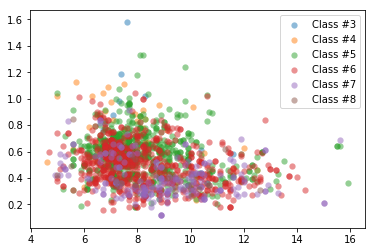

In [64]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [65]:
#! pip install imblearn
from imblearn.over_sampling import SMOTE

#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html


# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

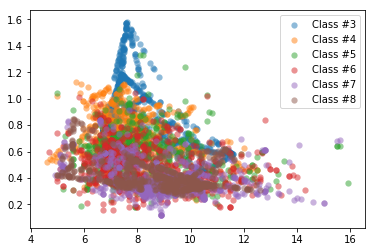

In [66]:
# Plot our data by running our plot data function on X and y
plot_data(X_resampled, y_resampled)

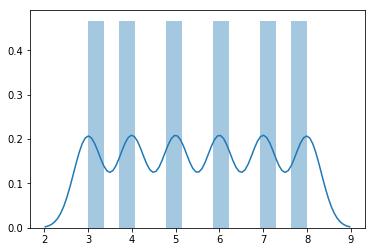

In [67]:
sns.distplot(y_resampled)

In [68]:
len(y_resampled)

4056

In [ ]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,
                                               test_size=0.2,random_state=0)
run_model(X_train,y_train)


### GridSearch

In [271]:
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':['gini','entropy'],
             'min_samples_split':list(range(2,10)),
             'min_samples_leaf':list(range(1,5))}
searcher = GridSearchCV(dt, parameters,cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3}
Best CV accuracy 0.7167584579071598


In [272]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'n_estimators':list(range(10,100,10)),
              'min_samples_split':list(range(2,10)),
              'min_samples_leaf':list(range(1,5)),
              'max_depth': list(range(2,11,2))}
searcher = GridSearchCV(rf, parameters,cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Best CV accuracy 0.7482297403619197


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
              'n_estimators':list(70),
              'min_samples_split':list(range(2,10)),
              'min_samples_leaf':list(range(1,5)),
              'max_depth': list(range(2,11,2))}
searcher = GridSearchCV(rf, parameters,cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

## content based recommendation

In [255]:
import pandas as pd
#from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [262]:
df = red[['review']]
df['ID'] = range(0,len(df['review']))
df.head()

,review,ID
0,An interesting wine that makes you think. Stra...,0
1,This is such a wonderful value. It's rich in c...,1
2,"Plump, sweet and plush peach flavors fill nose...",2
3,This refined sparkling wine has a classic Fran...,3
4,A flamboyant Chardonnay. Shows flashy scents o...,4


In [263]:
# putting the review in a list of words
df['review'] = df['review'].map(lambda x: x.lower().replace(',',' ').replace('.',' ').replace('!', ' '))
df.head()

,review,ID
0,an interesting wine that makes you think stra...,0
1,this is such a wonderful value it's rich in c...,1
2,plump sweet and plush peach flavors fill nose...,2
3,this refined sparkling wine has a classic fran...,3
4,a flamboyant chardonnay shows flashy scents o...,4


In [264]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['review'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [265]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim[0:5]

array([[1.        , 0.25522131, 0.28723811, ..., 0.25928149, 0.20004001,
        0.26255252],
       [0.25522131, 1.        , 0.40058289, ..., 0.44194887, 0.27897624,
        0.34174589],
       [0.28723811, 0.40058289, 1.        , ..., 0.36927447, 0.47212239,
        0.42735216],
       [0.26274693, 0.33824071, 0.47701498, ..., 0.35634832, 0.35053409,
        0.39692831],
       [0.29149154, 0.22931601, 0.29197275, ..., 0.24708311, 0.29738086,
        0.24019223]])

In [266]:
# function that takes in wineID as input and returns the top 10 recommended wines
def recommendations(wineID, cosine_sim = cosine_sim):
    
    recommended_wine = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == wineID].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_wine.append(list(df.index)[i])
        
    return recommended_wine

In [267]:
recommendations(2)

[1260, 421, 1013, 614, 767, 1471, 730, 1061, 167, 390]